<a href="https://colab.research.google.com/github/Trung0Minh/AIO2023-MODULE-3/blob/main/genetic_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [5]:
def load_data_from_file(filename):
    data = np.genfromtxt(filename, delimiter=',', skip_header=1)
    features_X = data[:, :3]
    sales_y = data[:, 3]
    features_X = np.hstack([np.ones((features_X.shape[0], 1)), features_X])
    return features_X, sales_y

In [6]:
filename = 'advertising.csv'
features_X, sales_y = load_data_from_file(filename)
features_X.shape,  sales_y.shape

((200, 4), (200,))

In [7]:
def generate_random_value(bound=10):
    return (random.random() - 0.5) * bound

In [8]:
def create_individual(n=4, bound=10):
    individual = [generate_random_value() for _ in range(n)]
    return individual

In [10]:
individual = create_individual()
np.array(individual)

array([ 1.27043092,  3.28961535,  0.50188002, -1.14330162])

In [ ]:
features_X.shape

(200, 4)

In [11]:
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = np.dot(features_X, theta)
    loss = np.multiply((y_hat - sales_y), (y_hat - sales_y)).mean()
    return loss

In [12]:
loss = compute_loss(individual)
loss

276158.4405283295

In [13]:
def compute_fitness(individual):
    return 1 / (1 + compute_loss(individual))

In [14]:
features_X , sales_Y = load_data_from_file (filename)
individual = [4.09 , 4.82 , 3.10 , 4.02]
fitness_score = compute_fitness ( individual )
print ( fitness_score )

1.0185991537088997e-06


In [ ]:
random.random()

0.7174844086330524

In [15]:
def crossover(individual1, individual2, crossover_rate=0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    for i in range(len(individual1)):
        if random.random() < crossover_rate:
            individual1_new[i], individual2_new[i] = individual2_new[i], individual1_new[i]
    return individual1_new, individual2_new

In [29]:
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
individual1 , individual2 = crossover ( individual1 , individual2 , 2.0)
print (" individual1 : ", individual1 )
print (" individual2 : ", individual2 )

 individual1 :  [3.44, 2.57, -0.79, -2.41]
 individual2 :  [4.09, 4.82, 3.1, 4.02]


In [23]:
def mutate(individual, mutation_rate=0.05, bound=10):
    individual_new = individual.copy()
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual_new[i] = generate_random_value()
    return individual_new

In [24]:
before_individual = [4.09 , 4.82 , 3.10 , 4.02]
after_individual = mutate ( individual , mutation_rate = 2.0)
print ( before_individual == after_individual )

False


In [25]:
def initializePopulation(m):
    population = [create_individual() for _ in range(m)]
    return population

In [26]:
def selection(sorted_old_population, m=100):
    index1 = np.random.randint(0, m - 1)
    while True:
        index2 = np.random.randint(0, m - 1)
        if index1 != index2:
            break
    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]
    return individual_s

In [39]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen % 1 == 0:
       print("Best loss: ", compute_loss(sorted_population[m - 1]), "with chromsome: ", sorted_population[m - 1])

    new_population = []
    while len(new_population) < m - elitism:
        # selection
        individual1 = selection(sorted_population, m)
        individual2 = selection(sorted_population, m)

        # cross over
        individual1, individual2 = crossover(individual1, individual2)

        # mutation
        individual1 = mutate(individual1)
        individual2 = mutate(individual2)

        new_population.append(individual1)
        new_population.append(individual2)

    for ind in sorted_population[m - elitism:]:
        new_population.append(ind)

    return new_population, compute_loss(sorted_population[m - 1])

In [40]:
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
old_population = [ individual1 , individual2 ]
new_population , _ = create_new_population ( old_population , elitism =2, gen =1)

Best loss:  123415.051528805 with chromsome:  [3.44, 2.57, -0.79, -2.41]


In [41]:
def run_GA():
    n_generations = 100
    m = 600
    features_X, sales_y = load_data_from_file('advertising.csv')
    population = initializePopulation(m)
    losses_list = []
    for i in range(n_generations):
        population, loss = create_new_population(population, elitism=2, gen=i)
        losses_list.append(loss)
    return population, losses_list

In [33]:
def visualize_plot(losses_list):
    plt.plot(losses_list)
    plt.xlabel('Generation')
    plt.ylabel('Loss')
    plt.title('Loss vs Generation')
    plt.show()

Best loss:  943.6473659097837 with chromsome:  [3.36212870107629, -0.037478420657953704, 1.757753989521097, -0.16232707274272284]
Best loss:  80.68444457302772 with chromsome:  [0.9905389640957685, 0.08843170820652335, -0.035624007660086665, -0.1642333884003988]
Best loss:  80.68444457302772 with chromsome:  [0.9905389640957685, 0.08843170820652335, -0.035624007660086665, -0.1642333884003988]
Best loss:  80.68444457302772 with chromsome:  [0.9905389640957685, 0.08843170820652335, -0.035624007660086665, -0.1642333884003988]
Best loss:  80.68444457302772 with chromsome:  [0.9905389640957685, 0.08843170820652335, -0.035624007660086665, -0.1642333884003988]
Best loss:  80.68444457302772 with chromsome:  [0.9905389640957685, 0.08843170820652335, -0.035624007660086665, -0.1642333884003988]
Best loss:  80.68444457302772 with chromsome:  [0.9905389640957685, 0.08843170820652335, -0.035624007660086665, -0.1642333884003988]
Best loss:  80.68444457302772 with chromsome:  [0.9905389640957685, 0.08

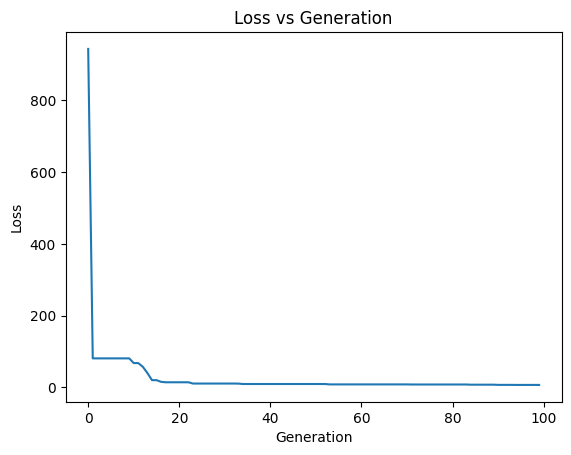

In [42]:
population, losses_list = run_GA()
visualize_plot(losses_list)

In [48]:
sorted_population = sorted(population, key=lambda x: compute_fitness(x), reverse=True)
print(sorted_population[-1])
theta = np.array(sorted_population[-1])
theta.shape, features_X[0].shape

[4.895894160655493, 4.914596007897365, 0.24323800405156693, -0.03872960357964472]


((4,), (4,))

In [53]:
def visualize_predict_gt():
    sorted_population = sorted(population, key=lambda x: compute_fitness(x), reverse=False)
    print(sorted_population[-1])
    theta = np.array(sorted_population[-1])

    estimated_prices = []
    for feature in features_X:
        estimated_prices.append(np.dot(feature, theta))

    fig , ax = plt . subplots ( figsize =(10 , 6))
    plt . xlabel ('Samples')
    plt . ylabel ('Price')
    plt . plot ( sales_Y , c='green', label ='Real Prices')
    plt . plot ( estimated_prices , c='blue', label ='Estimated Prices')
    plt . legend ()
    plt . show ()

[4.895894160655493, 0.04553088231678437, 0.13266309117278774, -0.03872960357964472]


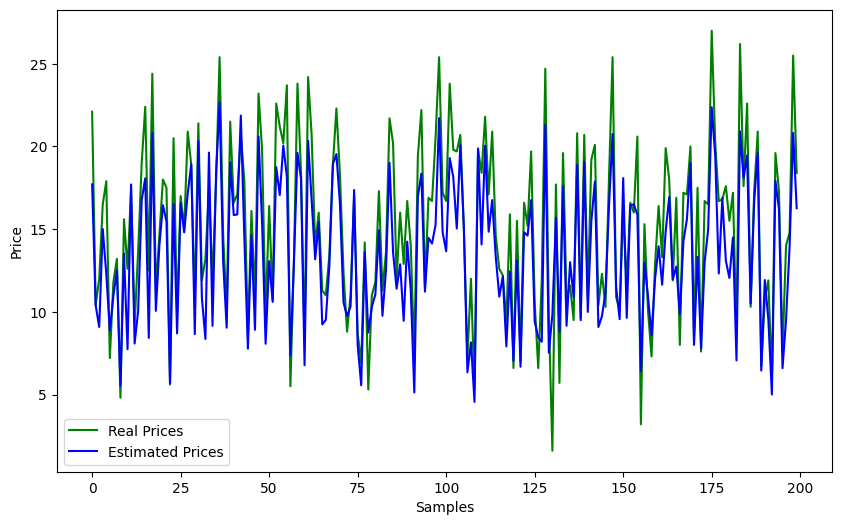

In [54]:
visualize_predict_gt()